# Offline plotting with categorical data

This notebook is a collection of plotting examples using `plot_by_id` and caterogical (string-valued) data. The notebook should cover all possible permutations of categorical versus numerical data.

In [1]:
import numpy as np

from qcodes import Parameter
from qcodes.dataset.plotting import plot_by_id, get_data_by_id
from qcodes.dataset.measurements import Measurement

## 1D plotting

### Category is the independent parameter

An example with made-up sciency words and random values.

With the category as the independent parameter, `plot_by_id` will default to a bar plot as long as there is
at most one value per category. If more than one value is found for any category a bar plot i snot possible, and `plot_by_id` falls back to a scatter plot.

In [36]:
voltage = Parameter('voltage',
                    label='Voltage',
                    unit='V',
                    set_cmd=None,
                    get_cmd=None)
fridge_config = Parameter('config',
                          label='Fridge configuration',
                          set_cmd=None,
                          get_cmd=None)

meas = Measurement()
meas.register_parameter(fridge_config, paramtype='text')
meas.register_parameter(voltage, setpoints=(fridge_config,))

with meas.run() as datasaver:

    configurations = ['open', 'outer chamber closed',
                      'pumping', 'closed']
    
    for configuration in configurations:
        datasaver.add_result((fridge_config, configuration),
                             (voltage, np.random.rand()))


run_id = datasaver.run_id

Starting experimental run with id: 276


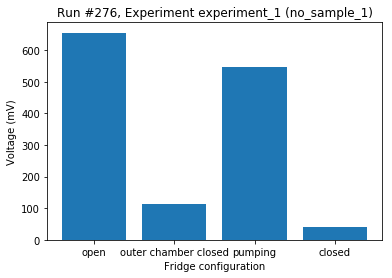

In [37]:
_ = plot_by_id(run_id)

Starting experimental run with id: 277


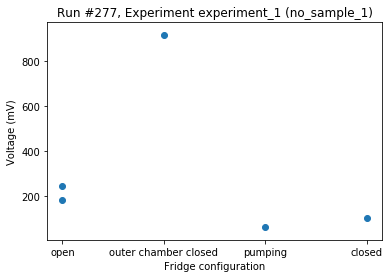

In [38]:
with meas.run() as datasaver:

    configurations = ['open', 'outer chamber closed',
                      'pumping', 'closed']
    
    for configuration in configurations:
        datasaver.add_result((fridge_config, configuration),
                             (voltage, np.random.rand()))


    datasaver.add_result((fridge_config, 'open'),
                         (voltage, np.random.rand()))
        
run_id = datasaver.run_id  

_ = plot_by_id(run_id)

### Category is the dependent parameter

With the categories as the dependent variable, i.e. the _outcome_ of a measurement, `plot_by_id` defaults to a scatter plot.

Here an example with made-up sciency words and random values.

**UNRESOLVED**: How do we ensure the y-axis order?


In [43]:
voltage = Parameter('voltage',
                    label='Voltage',
                    unit='V',
                    set_cmd=None,
                    get_cmd=None)
response = Parameter('response',
                     label='Sample response',
                     set_cmd=None,
                     get_cmd=None)

meas = Measurement()
meas.register_parameter(voltage)
meas.register_parameter(response, paramtype='text', setpoints=(voltage,))


with meas.run() as datasaver:

    for volt in np.linspace(0, 1, 50):
        coinvalue = volt + 0.5*np.random.randn()
        if coinvalue < 0:
            resp = 'Bad'
        elif coinvalue < 0.8:
            resp = 'Good'
        else:
            resp = 'Excellent'
            
        datasaver.add_result((voltage, volt),
                             (response, resp))
            
run_id = datasaver.run_id

Starting experimental run with id: 280


([<matplotlib.axes._subplots.AxesSubplot at 0x25fc9b667b8>], [None])

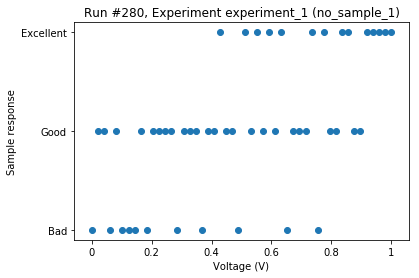

In [44]:
_ = plot_by_id(run_id)

## Both variables are categorical

For both variables being categorical, `plot_by_id` defaults to a scatter plot.

This case would typically be some summary of a large number of measurements.

In [45]:
sample = Parameter('sample',
                    label='Sample',
                    unit='',
                    set_cmd=None,
                    get_cmd=None)
feature = Parameter('feature',
                     label='Physical feature',
                     set_cmd=None,
                     get_cmd=None)

meas = Measurement()
meas.register_parameter(sample, paramtype='text')
meas.register_parameter(feature, paramtype='text', setpoints=(sample,))


with meas.run() as datasaver:

    features = ['superconducting', 'qubit',
                'clean states', 'high bandwidth']
    
    for samp in ['Nanowire', 'Silicon Chip', 'SQUID', 'Membrane']:

        feats = np.random.randint(1, 5)
        for _ in range(feats):

            datasaver.add_result((sample, samp),
                                 (feature, features[np.random.randint(0, 4)]))
    
run_id = datasaver.run_id

Starting experimental run with id: 281


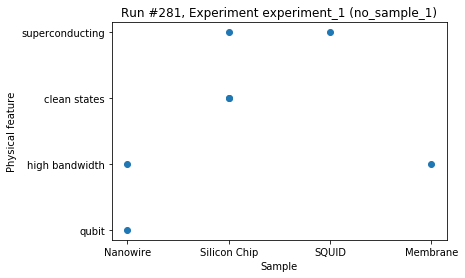

In [46]:
_ = plot_by_id(run_id)